In [82]:
import pandas as pd

In [87]:
df = pd.read_csv('transactions.csv')

top = df[df['STATUS'] == 'OK'].sort_values(by=['SUM'], ascending=False).head(3)
print(top.loc[:,['CONTRACTOR', 'SUM']])

Umbrella = df[(df['CONTRACTOR'] == 'Umbrella, Inc') & (df['STATUS'] == 'OK')]
total_sum = Umbrella['SUM'].sum()
print('Полная сумма реально проведённых платежей в адрес Umbrella, Inc:', total_sum)

         CONTRACTOR     SUM
5085      Acme, Inc  100500
4451  Umbrella, Inc    1000
1348      Acme, Inc     999
Полная сумма реально проведённых платежей в адрес Umbrella, Inc: 925719


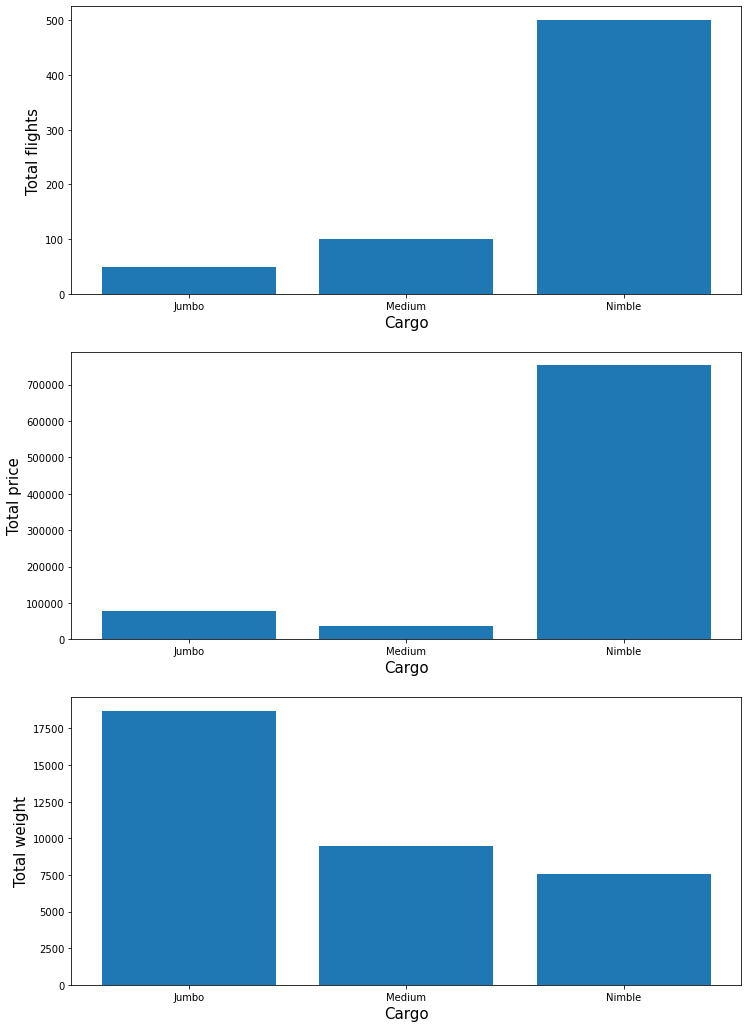

In [84]:
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('flights.csv').groupby('CARGO')
fig, ax = plt.subplots(3,1, figsize=[12, 18])

total_flights = df['CARGO'].count()
ax[0].set_xlabel('Cargo',fontsize = 15)
ax[0].set_ylabel('Total flights',fontsize = 15)
ax[0].bar(total_flights.index, total_flights.values)

total_price = df['PRICE'].sum()
ax[1].set_xlabel('Cargo', fontsize = 15)
ax[1].set_ylabel('Total price', fontsize = 15)
ax[1].bar(total_price.index, total_price.values)

total_weight = df['WEIGHT'].sum()
ax[2].set_xlabel('Cargo', fontsize = 15)
ax[2].set_ylabel('Total weight', fontsize = 15)
ax[2].bar(total_weight.index, total_weight.values)

fig.savefig('episode-2.png', bbox_inches = 'tight')

               кол-во студентов
group_faculty                  
2                             4
3                             2
4                             1
5                             4
           кол-во студентов
group_out                  
33                        7
35                        3
36                        1


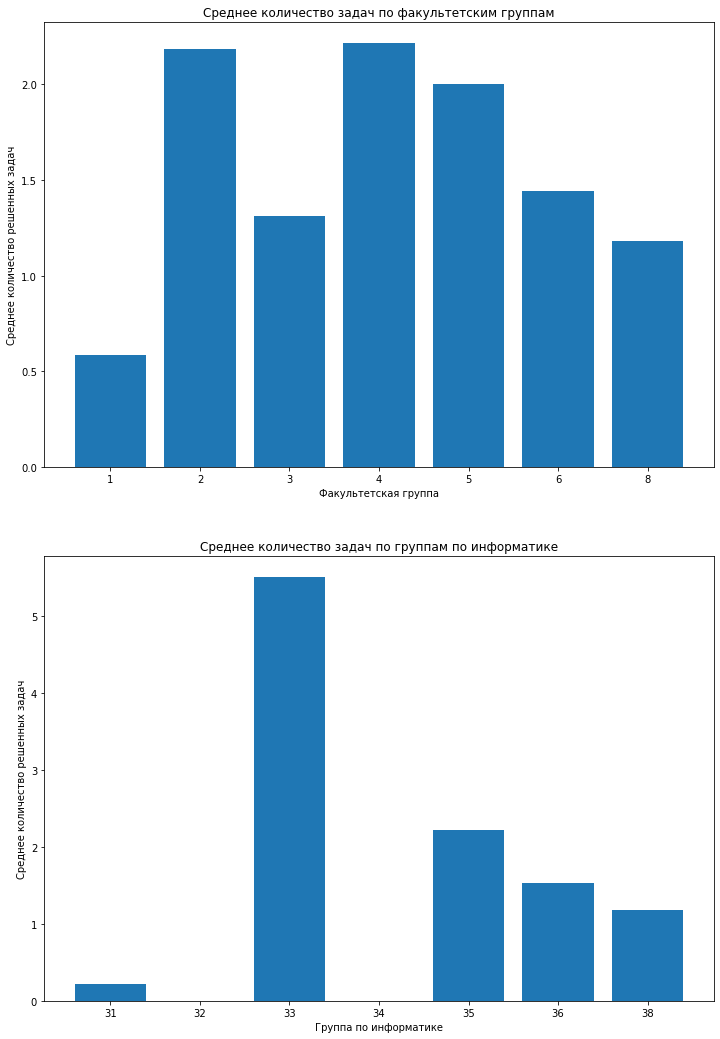

In [85]:
import zipfile
import os
archive = zipfile.ZipFile('students.zip', 'r')
a = archive.read('students_info.xlsx')
students = pd.read_excel(a)
b = archive.read('results_ejudge.html')
results = pd.read_html(b)[0]
whole = pd.merge(students, results, left_on='login', right_on='User')

whole['group_faculty'] = whole['group_faculty'].astype(str)
whole['group_out'] = whole['group_out'].astype(str)


fac_aver = whole.groupby('group_faculty')['Solved'].mean()
group_aver = whole.groupby('group_out')['Solved'].mean()

fig, ax = plt.subplots(2,1, figsize=[12, 18])


ax[0].bar(fac_aver.index, fac_aver.values)
ax[0].set_title('Среднее количество задач по факультетским группам')
ax[0].set_xlabel('Факультетская группа')
ax[0].set_ylabel('Среднее количество решенных задач')

ax[1].set_title('Среднее количество задач по группам по информатике')
ax[1].bar(group_aver.index, group_aver.values)
ax[1].set_xlabel('Группа по информатике')
ax[1].set_ylabel('Среднее количество решенных задач')

fig.savefig('episode-3.png', bbox_inches = 'tight')


GH_data = whole[(whole['G'] > 10) | (whole['H'] > 10)]
group_faculty = pd.DataFrame(GH_data.groupby('group_faculty')['login'].count())
group_faculty.rename(columns = { 'login' : 'кол-во студентов'}, inplace = True)
group_faculty.rename(columns = { 'group_faculty' : 'Номер факультетской'})

group_out = pd.DataFrame(GH_data.groupby('group_out')['login'].count())
group_out.rename(columns = {'group_faculty' : 'Номер группы по информатике', 'login' : 'кол-во студентов'}, inplace = True)

print(group_faculty)
print(group_out)